# XGBoost Shapley values

From our paper on "Explainable Prediction of Acute Myocardial Infarction using Machine Learning and Shapley Values"

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import pickle
import shap
# load JS visualization code
shap.initjs()

## Loading Data and XGBoost Model

In [2]:
# Load data
# Import train and test data into dataframes from csv files produced using the data processing code
df_train = pd.read_csv("train.csv", header=None)
df_train = df_train.sample(frac=1)
df_test = pd.read_csv("test.csv", header=None)
# Get data from dataframes
train_y = np.array(df_train[11].values).astype(np.int8)
train_x = np.array(df_train[list(range(11))].values)
test_y = np.array(df_test[11].values).astype(np.int8)
test_x = np.array(df_test[list(range(11))].values)

In [3]:
# Load model from file
model = pickle.load(open("XGBoost_pretrained.model", "rb"))

## Shapley Analysis 

In [4]:
# Prepare the dataframe to feed into the Shapley model 
test_x_df = pd.DataFrame(data=test_x, columns=['RR','PR','QRS','QT','QTc','P_wave_axis', 'QRS_axis', 'T_wave_axis', 'ACCI','sex', 'Birthyeargroup'])
test_x_df.head()

,RR,PR,QRS,QT,QTc,P_wave_axis,QRS_axis,T_wave_axis,ACCI,sex,Birthyeargroup
0,0.606987,0.000000,0.375000,0.615385,0.055556,-1.034483,-1.163265,-1.000000,-0.500000,0.0,0.500000
1,0.340611,0.062500,-0.500000,0.384615,0.111111,-1.793103,0.040816,-0.903226,-0.500000,-1.0,0.666667
2,0.537118,0.059126,1.072623,0.520269,0.029277,-0.754897,-1.470227,-1.363546,-0.013497,0.0,0.008998
3,-0.375546,0.437500,0.750000,-0.346154,0.111111,-0.724138,-1.081633,-0.354839,-0.250000,0.0,0.166667
4,-0.641921,-0.262154,0.375000,-0.933049,-0.405094,-0.342592,-0.624151,-0.342293,0.233795,0.0,0.311727


In [5]:
# Explain the model's predictions using SHAP
Explainer = shap.TreeExplainer(model)
shap_values = Explainer.shap_values(test_x_df)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [6]:
# Visualize the first prediction's explanation
shap.force_plot(Explainer.expected_value, shap_values[0,:], test_x_df.iloc[0,:])

In [7]:
# Visualize the training set predictions (from sample 1 to 1000)
shap.force_plot(Explainer.expected_value, shap_values[:1000], test_x_df[:1000])

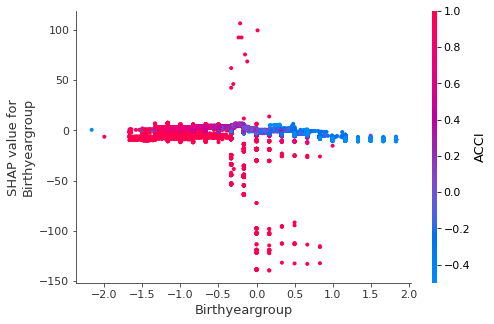

In [8]:
# Create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Birthyeargroup", shap_values, test_x_df)

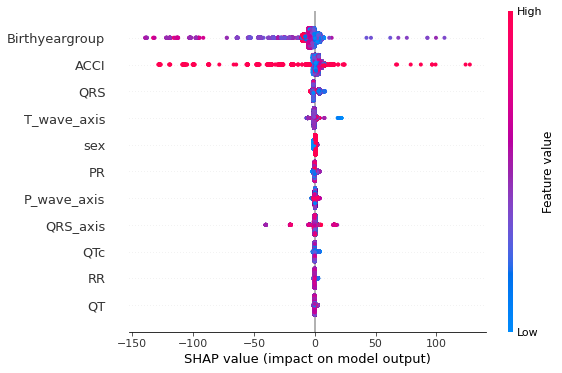

In [9]:
# Summarize the effects of all the features 
shap.summary_plot(shap_values, test_x_df)

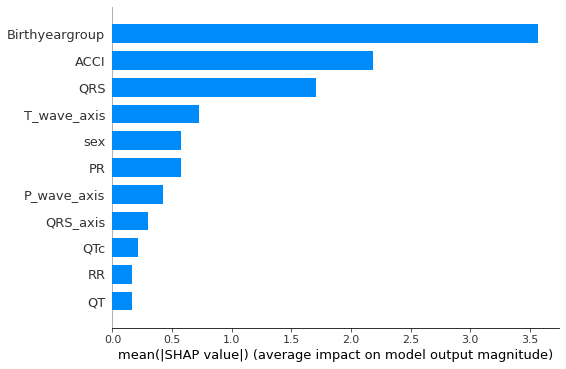

In [10]:
# Global feaure imporance: average absolute value across the whole datset (testing dataset)
shap.summary_plot(shap_values, test_x_df, plot_type="bar")